**Bryan Christoper - 0706022210022**

# **Week 7**


---


## Random Forest and Gradient Boosting Classifier
Today lab exercise will be using Bank Marketing Dataset
- Download the **Bank Marketing Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
Age <br>
Job : type of job <br>
Marital : marital status <br>
Education <br>
Default: has credit in default? <br>
Housing: has housing loan? <br>
Loan: has personal loan? <br>
Contact: contact communication type <br>
Month: last contact month of year <br>
Day: last contact day of the week <br>
Duration: last contact duration, in seconds. Important
note: this attribute highly affects the output target (e.g., if
duration=0 then y='no'). <br>
Campaign: number of contacts performed during this campaign and for
this client (includes last contact) <br>
Pdays: number of days that passed by after the client was last
contacted from a previous campaign (999 means client was not
previously contacted) <br>
Previous: number of contacts performed before this campaign and for
this client <br>
Poutcome: outcome of the previous marketing campaign <br>
y: has the client subscribed a term deposit?

## Import Libraries

In [12]:
#Import Library

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [2]:
#Load dataset
df = pd.read_csv(r'https://raw.githubusercontent.com/BChristoper/Excercise_Data_Mining_Week7/refs/heads/main/bank.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


## Exploratory Data Analysis
Explore the data to identify patterns within the dataset. <br>
Hint: <br>
* There are no missing values, but some columns contain 'unknown' values. Decide whether it is best to drop it or not.
* The 'admin' and 'management' unique value in the job column represent similar roles, so you can combine them under a single categorical value.




In [3]:
df = df[df['poutcome'] != 'unknown']  # Drop rows where 'poutcome' is 'unknown'
df['education'] = df['education'].replace('unknown', df['education'].mode()[0]) 
df['contact'] = df['contact'].replace('unknown', df['contact'].mode()[0]) 
df['job'] = df['job'].replace(['admin.', 'management'], 'admin_management') 
df['job'] = df['job'].replace({'admin.': 'administrative', 'management': 'administrative'})
df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3236,43,blue-collar,married,primary,no,2519,yes,no,cellular,16,apr,257,2,146,9,other,no
1871,34,services,divorced,secondary,no,991,yes,no,cellular,6,may,89,1,344,1,failure,no
4337,73,retired,married,secondary,no,519,no,no,telephone,16,oct,434,1,57,1,failure,yes
101,38,admin_management,single,tertiary,no,493,yes,no,cellular,11,may,553,1,367,7,failure,no
2255,36,admin_management,single,tertiary,no,1531,yes,no,cellular,8,may,81,3,170,1,failure,no
2067,41,housemaid,divorced,primary,no,22,yes,no,cellular,18,nov,238,3,126,4,other,no
4201,36,unemployed,married,secondary,no,-872,yes,yes,cellular,20,nov,153,1,183,1,failure,no
2951,36,technician,married,secondary,no,55,yes,no,cellular,13,may,38,2,369,4,failure,no
2306,36,technician,married,tertiary,no,6,yes,no,cellular,27,jan,100,1,435,1,failure,no
1760,35,technician,married,secondary,no,0,yes,no,cellular,9,nov,524,1,96,5,success,yes


## Machine Learning

In [4]:
column_encode = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']  

label_encoders = {}  
for col in column_encode:  
    le = LabelEncoder()  
    df[col] = le.fit_transform(df[col])  
    label_encoders[col] = le

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,33,6,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,0,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
5,35,0,2,2,0,747,0,0,0,23,3,141,2,176,3,0,0
6,36,5,1,2,0,307,1,0,0,14,8,341,1,330,2,1,0
9,43,6,1,0,0,-88,1,1,0,17,0,313,1,147,2,0,0


In [9]:
X = df.drop('y', axis=1)
y = df['y']

# Split into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Random Forest


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

Random Forest Classifier Results:
Accuracy: 0.8170731707317073
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88       118
           1       0.75      0.52      0.62        46

    accuracy                           0.82       164
   macro avg       0.79      0.73      0.75       164
weighted avg       0.81      0.82      0.81       164



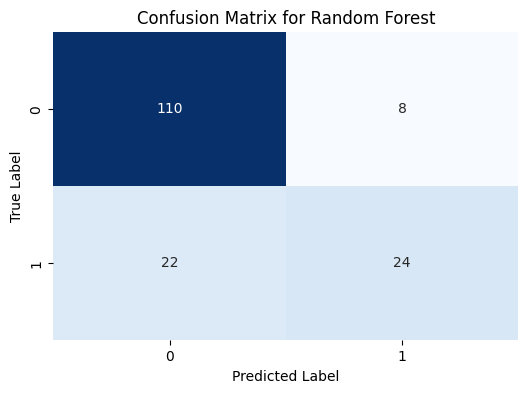

In [ ]:
# Random Forest Classifier
print("Random Forest Classifier Results:")
# a. Define the model
rf_model = RandomForestClassifier(random_state=42)
# b. Train the model
rf_model.fit(X_train, y_train)
# c. Predict the test set results
y_pred_rf = rf_model.predict(X_test)
# d. Check accuracy score
rf_accuracy = accuracy_score(y_test, y_pred_rf)
# e. Confusion matrix and classification report
rf_confusion = confusion_matrix(y_test, y_pred_rf)
rf_classification_report = classification_report(y_test, y_pred_rf)
print(f"Accuracy: {rf_accuracy}")
print("Classification Report:\n", rf_classification_report)
# f. Conclusion
#Random Forest model achieved an accuracy of 81.7% (0.817)

# Plot confusion matrix for Random Forest
plt.figure(figsize=(6, 4))
sns.heatmap(rf_confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Gradient Boosting Classifier


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>


Gradient Boosting Classifier Results:
Accuracy: 0.8353658536585366
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89       118
           1       0.79      0.57      0.66        46

    accuracy                           0.84       164
   macro avg       0.82      0.75      0.77       164
weighted avg       0.83      0.84      0.83       164



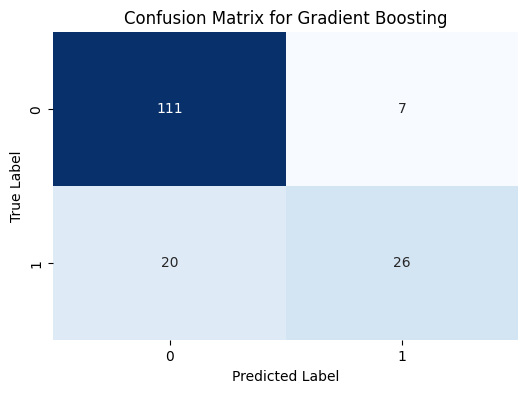

In [ ]:
# Gradient Boosting Classifier
print("\nGradient Boosting Classifier Results:")
# a. Define the model
gb_model = GradientBoostingClassifier(random_state=42)
# b. Train the model
gb_model.fit(X_train, y_train)
# c. Predict the test set results
y_pred_gb = gb_model.predict(X_test)
# d. Check accuracy score
gb_accuracy = accuracy_score(y_test, y_pred_gb)
# e. Confusion matrix and classification report
gb_confusion = confusion_matrix(y_test, y_pred_gb)
gb_classification_report = classification_report(y_test, y_pred_gb)
print(f"Accuracy: {gb_accuracy}")
print("Classification Report:\n", gb_classification_report)
# f. Conclusion
# The model achieved an accuracy of 83.5% (0.835), which is slightly higher than the Random Forest classifier (81.7%).
# Plot confusion matrix for Gradient Boosting
plt.figure(figsize=(6, 4))
sns.heatmap(gb_confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix for Gradient Boosting')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()